In [684]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from sklearn.model_selection import  train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [798]:
train = pd.read_csv('/Users/dan/desktop/ps2_available_dataset.csv')
test = pd.read_csv('/Users/dan/desktop/ps2_kaggle_predict.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   treatment       10000 non-null  int64  
 1   age             10000 non-null  int64  
 2   blood_pressure  10000 non-null  float64
 3   gender          10000 non-null  object 
 4   blood_test      10000 non-null  object 
 5   family_history  7068 non-null   object 
 6   MeasureA        10000 non-null  float64
 7   TestB           10000 non-null  float64
 8   GeneA           10000 non-null  object 
 9   GeneB           10000 non-null  int64  
 10  GeneC           10000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 859.5+ KB


In [785]:
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   treatment       7068 non-null   int64  
 1   age             7068 non-null   int64  
 2   blood_pressure  7068 non-null   float64
 3   gender          7068 non-null   object 
 4   blood_test      7068 non-null   object 
 5   family_history  7068 non-null   object 
 6   MeasureA        7068 non-null   float64
 7   TestB           7068 non-null   float64
 8   GeneA           7068 non-null   object 
 9   GeneB           7068 non-null   int64  
 10  GeneC           7068 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 662.6+ KB


### Data exploration

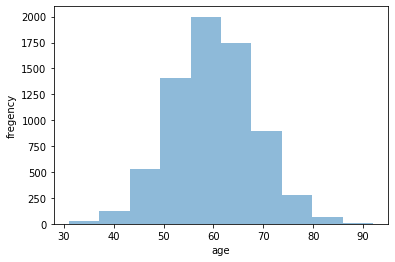

In [786]:
plt.hist(train.age,alpha = 0.5)
plt.xlabel('age')
plt.ylabel('fregency')
plt.show()

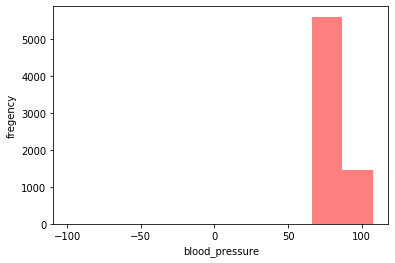

In [787]:
plt.hist(train.blood_pressure,alpha = 0.5,color = 'r')
plt.xlabel('blood_pressure')
plt.ylabel('fregency')
plt.show()
# Seems there are some outlier points.

In [788]:
train.blood_pressure.sort_values()

1954    -99.000000
1938    -99.000000
4054    -99.000000
3972     80.021252
7598     80.038294
           ...    
8877    103.082030
4020    104.114825
8073    104.933496
416     107.163785
2752    107.595583
Name: blood_pressure, Length: 7068, dtype: float64

In [789]:
train = train[train['blood_pressure'] > 0]
#delete rows where blood_pressure < 0

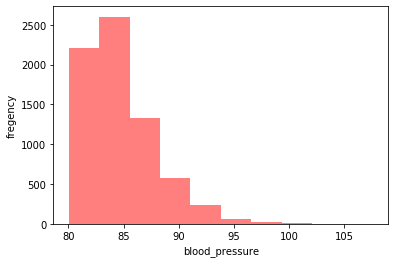

In [790]:
plt.hist(train.blood_pressure,alpha = 0.5,color = 'r')
plt.xlabel('blood_pressure')
plt.ylabel('fregency')
plt.show()

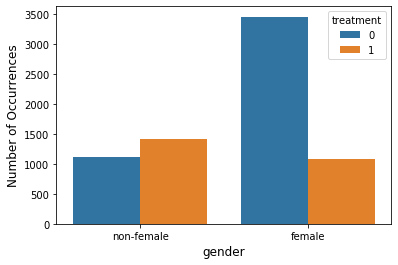

In [791]:
#int_level = train['gender'].value_counts()
#
#plt.figure(figsize=(6,4))
#sns.barplot(int_level.index, int_level.values, alpha=0.8)
#plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('gender', fontsize=12)
#plt.show()
#
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='treatment', data=train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('gender', fontsize=12)
plt.show()

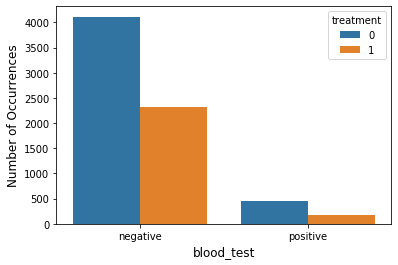

In [792]:
plt.figure(figsize=(6,4))
sns.countplot(x='blood_test', hue='treatment', data=train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('blood_test', fontsize=12)
plt.show()

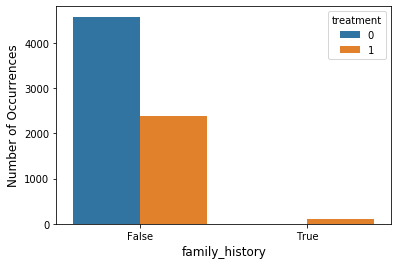

In [793]:
plt.figure(figsize=(6,4))
sns.countplot(x='family_history', hue='treatment', data=train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('family_history', fontsize=12)
plt.show()

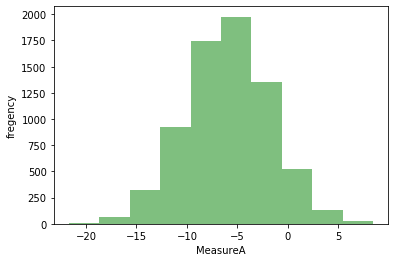

In [695]:
plt.hist(train.MeasureA,alpha = 0.5,color = 'g')
plt.xlabel('MeasureA')
plt.ylabel('fregency')
plt.show()

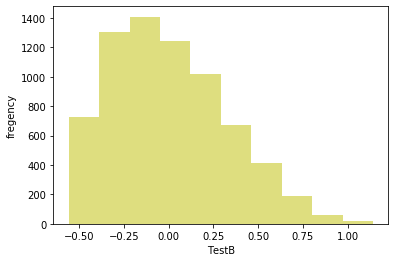

In [696]:
plt.hist(train.TestB,alpha = 0.5,color = 'y')
plt.xlabel('TestB')
plt.ylabel('fregency')
plt.show()

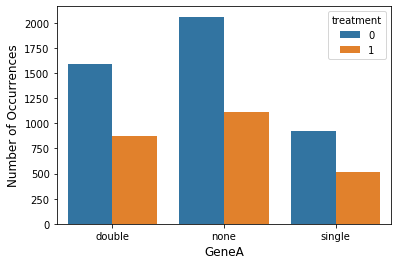

In [794]:
plt.figure(figsize=(6,4))
sns.countplot(x='GeneA', hue='treatment', data=train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('GeneA', fontsize=12)
plt.show()

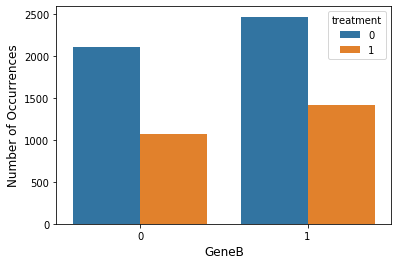

In [795]:
plt.figure(figsize=(6,4))
sns.countplot(x='GeneB', hue='treatment', data=train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('GeneB', fontsize=12)
plt.show()

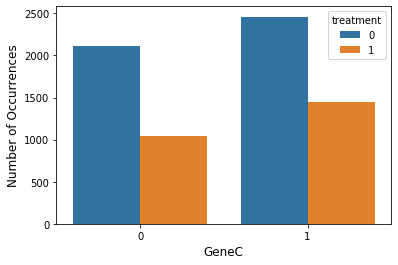

In [796]:
plt.figure(figsize=(6,4))
sns.countplot(x='GeneC', hue='treatment', data=train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('GeneC', fontsize=12)
plt.show()

### Data Processing

In [700]:
train = pd.read_csv('/Users/dan/desktop/ps2_available_dataset.csv')
test = pd.read_csv('/Users/dan/desktop/ps2_kaggle_predict.csv')

train = train.dropna()

train = train[train['blood_pressure'] > 0]

In [702]:
full_data = [train, test]

In [703]:
for dataset in full_data:
    dataset['cat_bp'] = pd.qcut(dataset['blood_pressure'],4)

In [704]:
print (train[['cat_bp','treatment']].groupby('cat_bp').mean())

                   treatment
cat_bp                      
(80.02, 82.341]     0.305037
(82.341, 83.968]    0.325028
(83.968, 86.306]    0.361835
(86.306, 107.596]   0.418460


In [705]:
for dataset in full_data:
    dataset.loc[ dataset['blood_pressure'] <= 82.341, 'blood_pressure'] = 0
    dataset.loc[(dataset['blood_pressure'] > 82.341) & (dataset['blood_pressure'] <= 83.968), 'blood_pressure'] = 1
    dataset.loc[(dataset['blood_pressure'] > 83.968) & (dataset['blood_pressure'] <= 86.306), 'blood_pressure'] = 2
    dataset.loc[ dataset['blood_pressure'] > 86.306, 'blood_pressure'] = 3
    

In [706]:
for dataset in full_data:
    dataset['cat_age'] = pd.qcut(dataset['age'],4)

In [707]:
print (train[['cat_age','treatment']].groupby('cat_age').mean())

                treatment
cat_age                  
(30.999, 54.0]   0.438970
(54.0, 60.0]     0.378074
(60.0, 65.0]     0.317542
(65.0, 92.0]     0.267989


In [708]:
for dataset in full_data:
    dataset.loc[ dataset['age'] <= 54, 'age'] = 0
    dataset.loc[(dataset['age'] > 54) & (dataset['age'] <= 60), 'age'] = 1
    dataset.loc[(dataset['age'] > 60) & (dataset['age'] <= 65), 'age'] = 2
    dataset.loc[ dataset['age'] > 65, 'age'] = 3

In [709]:
for dataset in full_data:
    dataset['cat_MA'] = pd.qcut(dataset['MeasureA'],4)

In [710]:
print (train[['cat_MA','treatment']].groupby('cat_MA').mean())

                   treatment
cat_MA                      
(-21.709, -8.757]   0.273911
(-8.757, -5.912]    0.322763
(-5.912, -3.145]    0.375425
(-3.145, 8.462]     0.438279


In [711]:
for dataset in full_data:
    dataset.loc[ dataset['MeasureA'] <= -8.757, 'MeasureA'] = 100
    dataset.loc[(dataset['MeasureA'] > -8.757) & (dataset['MeasureA'] <= -5.912), 'MeasureA'] = 200
    dataset.loc[(dataset['MeasureA'] > -5.912) & (dataset['MeasureA'] <= -3.145), 'MeasureA'] = 300
    dataset.loc[(dataset['MeasureA'] > -3.145) & (dataset['MeasureA'] <= 15), 'MeasureA'] = 400

In [712]:
train.sample(5)

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC,cat_bp,cat_age,cat_MA
3789,1,3,2.0,non-female,negative,False,100.0,-0.027100,none,0,0,"(83.968, 86.306]","(65.0, 92.0]","(-21.709, -8.757]"
8663,0,3,0.0,non-female,negative,False,100.0,0.588971,double,1,0,"(80.02, 82.341]","(65.0, 92.0]","(-21.709, -8.757]"
3241,0,1,3.0,female,negative,False,200.0,-0.230825,none,1,0,"(86.306, 107.596]","(54.0, 60.0]","(-8.757, -5.912]"
5233,0,0,1.0,female,negative,False,400.0,-0.384026,none,0,1,"(82.341, 83.968]","(30.999, 54.0]","(-3.145, 8.462]"
3410,1,0,3.0,female,negative,False,400.0,0.750183,single,1,1,"(86.306, 107.596]","(30.999, 54.0]","(-3.145, 8.462]"


In [713]:
for dataset in full_data:
    dataset['cat_TB'] = pd.qcut(dataset['TestB'],4)

In [714]:
print (train[['cat_TB','treatment']].groupby('cat_TB').mean())

                   treatment
cat_TB                      
(-0.559, -0.253]    0.500283
(-0.253, -0.0376]   0.210646
(-0.0376, 0.214]    0.206116
(0.214, 1.142]      0.493205


In [715]:
for dataset in full_data:
    dataset.loc[ dataset['TestB'] <= -0.253, 'TestB'] = 100
    dataset.loc[(dataset['TestB'] > -0.253) & (dataset['TestB'] <= -0.0376), 'TestB'] = 200
    dataset.loc[(dataset['TestB'] > -0.0376) & (dataset['TestB'] <= 0.214), 'TestB'] = 300
    dataset.loc[(dataset['TestB'] > 0.214) & (dataset['TestB'] <= 10), 'TestB'] = 400

In [716]:
train.sample(5)

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC,cat_bp,cat_age,cat_MA,cat_TB
5960,0,1,2.0,female,negative,False,300.0,300.0,none,0,1,"(83.968, 86.306]","(54.0, 60.0]","(-5.912, -3.145]","(-0.0376, 0.214]"
9323,1,0,0.0,non-female,negative,False,300.0,200.0,none,1,1,"(80.02, 82.341]","(30.999, 54.0]","(-5.912, -3.145]","(-0.253, -0.0376]"
1712,0,0,3.0,female,negative,False,400.0,200.0,none,1,1,"(86.306, 107.596]","(30.999, 54.0]","(-3.145, 8.462]","(-0.253, -0.0376]"
7668,1,1,3.0,female,negative,False,300.0,400.0,double,0,1,"(86.306, 107.596]","(54.0, 60.0]","(-5.912, -3.145]","(0.214, 1.142]"
5588,1,3,1.0,non-female,negative,False,100.0,200.0,none,1,1,"(82.341, 83.968]","(65.0, 92.0]","(-21.709, -8.757]","(-0.253, -0.0376]"


In [718]:
train = train.drop(columns = ['cat_bp','cat_age','cat_MA','cat_TB'], axis = 1)

In [719]:
test = test.drop(columns = ['cat_bp','cat_age','cat_MA','cat_TB'], axis = 1)

In [720]:
train.sample(5)

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
7568,0,0,0.0,female,negative,False,400.0,300.0,none,1,0
5731,0,2,1.0,female,negative,False,200.0,300.0,none,0,1
573,1,0,2.0,non-female,positive,False,400.0,100.0,none,1,0
1173,0,3,2.0,female,negative,False,100.0,300.0,single,1,1
8105,1,1,1.0,non-female,negative,False,300.0,300.0,none,0,0


In [721]:
train_c = train

In [722]:
train = pd.get_dummies(train, columns = ['age','blood_pressure','gender','blood_test','family_history', 'MeasureA', 'TestB', 'GeneA'], drop_first = True)

In [723]:
test = pd.get_dummies(test, columns = ['age','blood_pressure','gender','blood_test','family_history', 'MeasureA', 'TestB', 'GeneA'], drop_first = True)

### Performancfe evaluation: 0.816 (AUC score)

In [780]:
X = train.drop('treatment', axis = 1)
y = train.treatment
X_train,X_test,y_train,y_test = train_test_split(X,y)

param_grid = {'C':[0.01,0.1,1,5,10,100],'penalty':['l1','l2']}
lr = LogisticRegression()

grid = GridSearchCV(lr,param_grid, cv = 10, scoring = 'roc_auc', iid = False, return_train_score = True)
grid.fit(X_train,y_train)
grid.score(X_test,y_test)

0.8163120012517604

In [736]:
grid.best_estimator_

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [772]:
lr2 = LogisticRegression(C = 5, penalty = 'l2')
lr2.fit(X_train,y_train)
test = test.drop('Id',axis = 1)
lr2.predict(test)

array([0, 0, 0, ..., 0, 1, 0])

In [781]:
out = []
for i in lr2.predict_proba(test):
    out.append(i[1])

In [775]:
result = pd.read_csv('/Users/dan/desktop/ps2_kaggle_predict.csv')
result = pd.DataFrame(result['Id'])
result['Predicted'] = out
result

,Id,Predicted
0,0,0.038567
1,1,0.381682
2,2,0.352642
3,3,0.896275
4,4,0.672052
...,...,...
9995,9995,0.267456
9996,9996,0.118084
9997,9997,0.066257
9998,9998,0.801117


In [776]:
result.to_csv('/Users/dan/desktop/ps2_submission.csv',index = False)

### Importance of  features

In [745]:
train_c.sample(3)

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
2470,1,2,3.0,female,negative,False,200.0,300.0,double,0,0
2965,1,1,1.0,female,negative,False,300.0,100.0,none,0,0
551,0,0,3.0,female,negative,False,400.0,100.0,double,1,0


In [746]:
train_c['gender'] = train_c['gender'].map( {'female': 0, 'non-female': 1} ).astype(int)

In [747]:
train_c['blood_test'] = train_c['blood_test'].map( {'negative': 0, 'positive': 1} ).astype(int)

In [748]:
train_c.GeneA = train_c.GeneA.astype(str)

In [749]:
train_c['GeneA'] = train_c['GeneA'].map( {'none': 0, 'double': 1, 'single':2} ).astype(int)

In [750]:
train_c['family_history'] = train_c['family_history'].map( {False: 0, True: 1} ).astype(int)

In [751]:
train_c.MeasureA = train_c.MeasureA/100

In [752]:
train_c.TestB = train_c.TestB/100

In [753]:
train_c.sample(3)

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
927,1,1,3.0,1,0,0,3.0,3.0,0,0,0
1228,1,0,0.0,1,0,0,3.0,2.0,1,0,0
562,0,2,0.0,0,0,0,2.0,1.0,0,1,0


In [754]:
lr2 = LogisticRegression(C = 5)

X_c = train_c.drop('treatment', axis = 1)
y_c = train_c.treatment
X_train_c,X_test_c,y_train_c,y_test_c = train_test_split(X_c,y_c)

lr2.fit(X_train_c,y_train_c)
lr2.score(X_test_c,y_test_c)

0.7074136955291455

In [755]:
lr2.coef_[0]

array([-0.24650029,  0.19125866,  1.52748025, -0.58845191,  5.46338929,
        0.06633502,  0.00651495,  0.02855646,  0.19923747,  0.23886834])

In [756]:
a = list(X_train_c)
b = []
for i in lr2.coef_[0]:
    b.append(i)
b_abs = []
for i in b:
    b_abs.append(abs(i))
    

In [757]:
df = pd.DataFrame({'Feature':a, 'Coef':b_abs})
df = df.sort_values(by = 'Coef',ascending = False)
df

,Feature,Coef
4,family_history,5.463389
2,gender,1.527480
3,blood_test,0.588452
0,age,0.246500
9,GeneC,0.238868
8,GeneB,0.199237
1,blood_pressure,0.191259
5,MeasureA,0.066335
7,GeneA,0.028556
6,TestB,0.006515


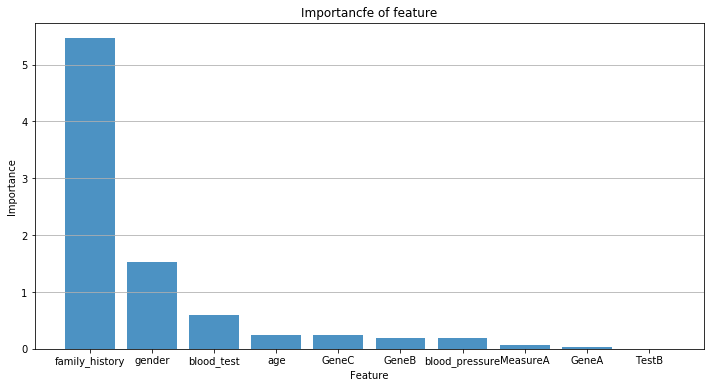

In [758]:
plt.figure(figsize = (12,6))
plt.bar(df.Feature,df.Coef,alpha = 0.8)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Importancfe of feature')
plt.grid(axis = 'y')
plt.show()